In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
data = pd.read_csv('data/ex1data2.txt', sep=",", header = None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2]:
X = data.loc[:,0:1].as_matrix()
y = data.loc[:,2].as_matrix()

In [3]:
def featureNormalize(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [4]:
X, mu, sigma = featureNormalize(X)

In [5]:
X = np.column_stack((np.ones(np.shape(X)[0]), X))

In [6]:
alpha = 0.01;
num_iters = 400;

In [7]:
theta = np.zeros((3, 1), dtype=float)

In [8]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters,1))
    for iter in range(num_iters):
        H = np.dot(X, theta)
        T = np.zeros((X.shape[1],1),dtype=X.dtype)
        for i in range(len(y)):
            T = T + float(H[i] - y[i]) * np.asmatrix(X[i]).T
        theta = theta - alpha * T / len(y)
        J_history[iter] = computeCostMulti(X, y, theta);
    return theta, J_history

In [9]:
def computeCostMulti(X, y, theta):
    H = np.dot(X, theta)
    J = np.sum(np.square(H - np.asmatrix(y).T)) / 2 / len(y)
    return J

In [10]:
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

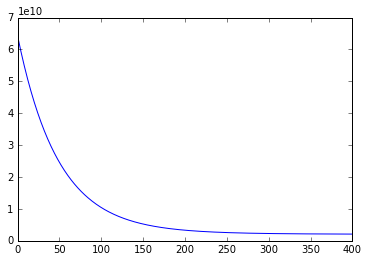

In [11]:
plt.plot(range(len(J_history)), J_history)

In [12]:
theta

matrix([[ 334302.06399328],
        [  99411.44947359],
        [   3267.01285407]])

Solving with normal equations

In [13]:
data = pd.read_csv('data/ex1data2.txt', sep=",", header = None)
X = data.loc[:,0:1].as_matrix()
y = data.loc[:,2].as_matrix()

In [14]:
X = np.column_stack((np.ones(np.shape(X)[0]), X))

In [15]:
def normalEqn(X, y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

In [16]:
theta = normalEqn(X, y);

In [17]:
theta

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])